## GROUP 21
- Sai Phani Ram Popuri : **2205577**
- Sandeep Potla : **2151524**
- Sai Suma Podila : **2149229**
- Manivardhan Reddy Pidugu : **2146807**

### Importing essential modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
from sklearn import datasets

%matplotlib inline

### Reading the dataset

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, 
                  noise = 0.2, 
                  random_state=42)

In [3]:
X

array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

In [4]:
# Labels or output
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

### Scatter plot of input X

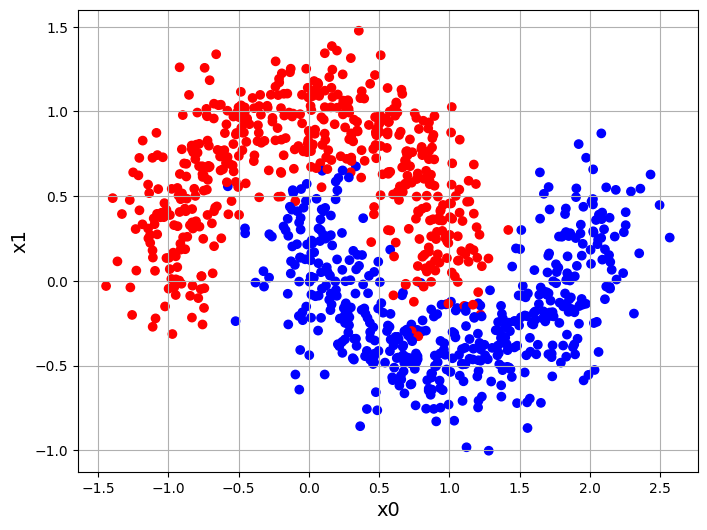

In [5]:
# If label == 0 mark it as Red else Blue
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.xlabel("x0", fontsize = 14)
plt.ylabel("x1", fontsize=14)
plt.grid();

### Splitting the data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Data Scaling

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1 - Support Vector Classifier using Linear Kernel

In [8]:
# Initializing the object
model_1 = SVC(kernel="linear", C=1000)

# Fitting the training data to model
model_1.fit(X_train_scaled, y_train)

SVC(C=1000, kernel='linear')

In [9]:
# Model Predictions using training data
y_pred_train = model_1.predict(X_train_scaled)
print("Accuracy of training data with Linear Kernel: ", accuracy_score(y_train, y_pred_train))

Accuracy of training data with Linear Kernel:  0.8571428571428571


In [10]:
# Model Predictions using test data
y_pred_test = model_1.predict(X_test_scaled)
print("Accuracy of test data with Linear Kernel: ", accuracy_score(y_test, y_pred_test))

Accuracy of test data with Linear Kernel:  0.8766666666666667


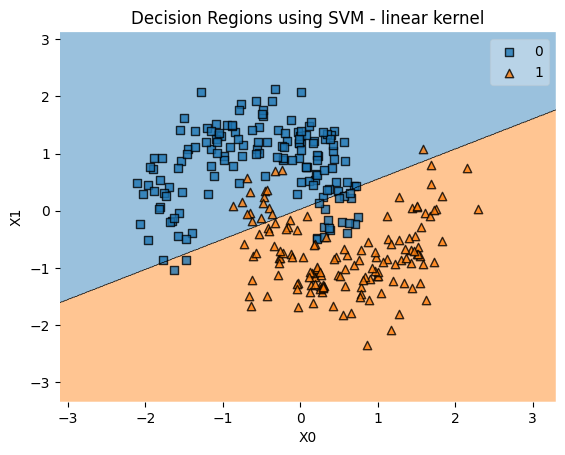

In [11]:
# Plotting the decision boundary
plot_decision_regions(X_test_scaled, y_test, clf = model_1)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - linear kernel');

### Plotting the margins

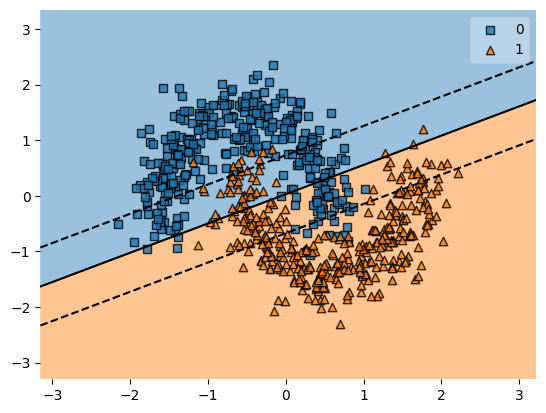

In [12]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model_1.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model_1);

### Model 2 - SVM with Polynomial Kernel

In [13]:
model_2 = SVC(kernel="poly", degree = 3, gamma = "scale")
model_2.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [14]:
# Model Predictions using test set
y_pred_2 = model_2.predict(X_test_scaled)
print("Accuracy score for test data using Polynomial Kernel: ", accuracy_score(y_test, y_pred_2))

Accuracy score for test data using Polynomial Kernel:  0.8766666666666667


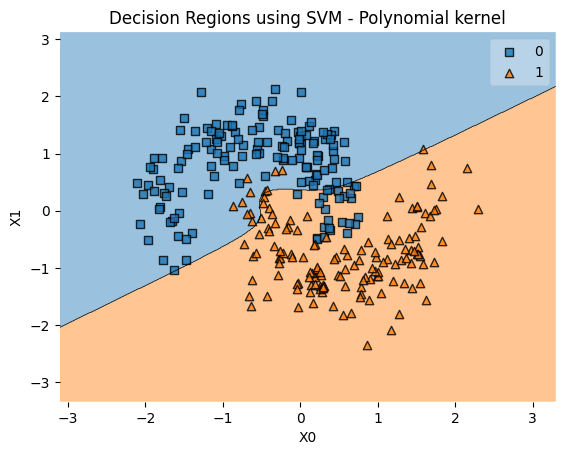

In [15]:
# Plotting Decision boundary
plot_decision_regions(X_test_scaled, y_test, clf = model_2)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - Polynomial kernel');

### Model 3 - SVM with Gaussian/ Radial Basis Function

In [16]:
model_3 = SVC(kernel="rbf")
# Training the model
model_3.fit(X_train_scaled, y_train)

SVC()

In [17]:
# Predictions using the test set
y_pred_3 = model_3.predict(X_test_scaled)

In [18]:
print("Accuracy score for test data with Gaussian Kernel: ", accuracy_score(y_test, y_pred_3))

Accuracy score for test data with Gaussian Kernel:  0.9766666666666667


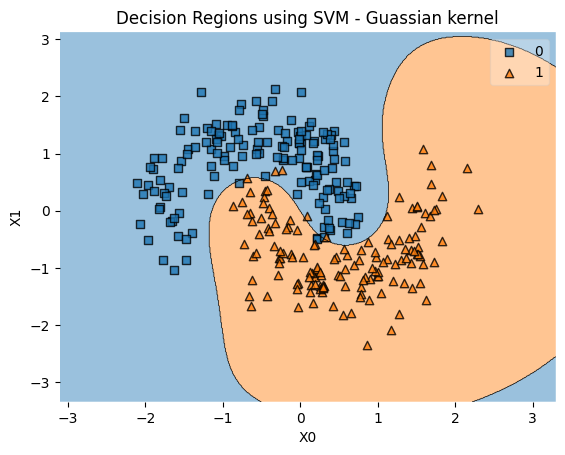

In [19]:
# Plotting the decision boundary
plot_decision_regions(X_test_scaled, y_test, clf = model_3)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Decision Regions using SVM - Guassian kernel');

### Using GridSearch CV

    - To find the set of hyperparameters that results in the best accuracy score (performance metric), the GridSearchCV cross validation has been employed. 

In [20]:
# Initializing the learning model
model_cv = SVC()

# Defining the hyper-parameters required to be optimized
param_grid = {
               'C': range(1, 5, 1),
               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'degree': range(2, 5, 1),
               'gamma': ['scale', 'auto'],
               'coef0': [0.1, 0.5, 1, 1.5, 2]
             }

# GridSearch CV returns the model with best set of hyper-parameters
best_model = GridSearchCV(model_cv, 
                          param_grid= param_grid, 
                          scoring = "accuracy",
                          cv = 5,
                          verbose = 2,
                          n_jobs = -1)

In [21]:
# Fitting the training data to the GridSearch CV output model
best_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END .C=1, coef0=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=3, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .C=1, coef0=0.1, degree=3, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=3, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...C=1, coef0=0.1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...C=1, coef0=0.1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ...C=1, coef0=0.1, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=4, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=4, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, coef0=0.1, degree=4, gamm

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 5), 'coef0': [0.1, 0.5, 1, 1.5, 2],
                         'degree': range(2, 5), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [23]:
print("Testing Accuracy based on the best set of hyperparameters: ", best_model.best_score_)
# Predictions using the test data
best_model_pred = best_model.predict(X_test_scaled)
print("Accuracy of the test set: ", accuracy_score(y_test, best_model_pred))

Testing Accuracy based on the best set of hyperparameters:  0.97
Accuracy of the test set:  0.97


### Best set of Hyper-parameters

In [24]:
best_model.best_params_

{'C': 4, 'coef0': 0.5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}

In [25]:
best_model.decision_function

<bound method BaseSearchCV.decision_function of GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 5), 'coef0': [0.1, 0.5, 1, 1.5, 2],
                         'degree': range(2, 5), 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)>

[CV] END .C=2, coef0=2, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .C=2, coef0=2, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END .C=2, coef0=2, degree=3, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END ..C=3, coef0=1, degree=4, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....C=3, coef0=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ....C=3, coef0=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ....C=3, coef0=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ....C=3, coef0=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ....C=3, coef0=1, degree=4, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .....C=3, coef0=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=3, coef0=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=3, coef0=1, degree=4, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .....C=3, coef0=1, 

### Plotting the decision boundary

In [ ]:
plot_decision_regions(X_test_scaled, y_test, clf = best_model)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Decision Regions using SVM - Guassian kernel');

**OBSERVATIONS**
    
    - Linear Kernel:
    
    1. It has been observed that the data is not linearly separable.
    2. With Linear Kernel, the Support Vector Machine performed really poor.
    3. Accuracy Score of the test data with the linear kernel model = 86%
    
    - Polynomial Kernel:
    
    4. Next, we have tried with the polynomial kernel function.
    5. It performed better when compared to the Linear Kernel.
    6. Accuracy score of the test data with the polynomial kernel model = 87.66%
    
    - Gaussian Kernel:
    
    7. Since, we are aware that the data is non-linearly separable, trying the classification with the Gaussian or the Radial Basis Function model.
    8. As expected, the model performed the best with this model.
    9. Accuracy score of the test data with the Guassian kernel model = 97.66%
    
    - Grid Search CV:
    
    - With the Grid Search CV, the Polynomial Kernel proved to be the best model we could use for the dataset with the following best set of parameters:
    
    - Best Set of hyper-parameters:
    
        {'C': 4, 'coef0': 0.5, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}    